<a href="https://colab.research.google.com/github/KhaldounN/Weather-Prediction-/blob/master/FINAL_DSF.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install plotly==4.5.2

     |████████████████████████████████| 7.1MB 5.2MB/s 
  Found existing installation: plotly 4.4.1
    Uninstalling plotly-4.4.1:
      Successfully uninstalled plotly-4.4.1


In [2]:
!pip3 install flair

     |████████████████████████████████| 450kB 4.1MB/s 
     |████████████████████████████████| 1.3MB 7.7MB/s 
     |████████████████████████████████| 71kB 6.1MB/s 
     |████████████████████████████████| 19.7MB 71.3MB/s 
     |████████████████████████████████| 798kB 45.4MB/s 
     |████████████████████████████████| 983kB 37.7MB/s 
     |████████████████████████████████| 1.1MB 41.3MB/s 
     |████████████████████████████████| 2.9MB 41.9MB/s 
     |████████████████████████████████| 890kB 39.0MB/s 
  Created wheel for ftfy: filename=ftfy-5.8-cp36-none-any.whl size=45613 sha256=a5dd47a1335ff606b22fb33d6cb36e6cc6868ec0748a2ecb15f0fa8a543234af
  Stored in directory: /root/.cache/pip/wheels/ba/c0/ef/f28c4da5ac84a4e06ac256ca9182fc34fa57fefffdbc68425b
  Created wheel for mpld3: filename=mpld3-0.3-cp36-none-any.whl size=116679 sha256=ce6ec82259580df85b873dd35f842bda8b8a6449a03423796d6a42a8246dbf08
  Stored in directory: /root/.cache/pip/wheels/c0/47/fb/8a64f89aecfe0059830479308ad42d62e898a3e3cef

In [3]:

!python -m spacy download en_core_web_md

     |████████████████████████████████| 96.4MB 1.1MB/s 
  Created wheel for en-core-web-md: filename=en_core_web_md-2.2.5-cp36-none-any.whl size=98051305 sha256=32b3feed6e46e1e6b0d2ac129bb4ecb1cc8b8f2a369dd78921b0fa5d7c4f3773
  Stored in directory: /tmp/pip-ephem-wheel-cache-jdjjpdjh/wheels/df/94/ad/f5cf59224cea6b5686ac4fd1ad19c8a07bc026e13c36502d81
Successfully built en-core-web-md
✔ Download and installation successful
You can now load the model via spacy.load('en_core_web_md')


# Train Model to classify Emotions

                                               Input Sentiment
0                            i didnt feel humiliated   sadness
1  i can go from feeling so hopeless to so damned...   sadness
2   im grabbing a minute to post i feel greedy wrong     anger
3  i am ever feeling nostalgic about the fireplac...      love
4                               i am feeling grouchy     anger


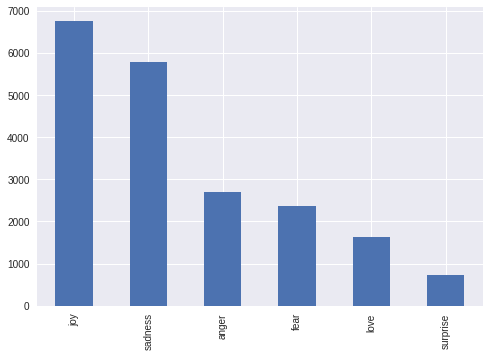

In [57]:
# Import data . data from source was saparerated so I can to concatenate it 

import pandas as pd 
from sklearn.model_selection import train_test_split

df_train = pd.read_csv('/content/train.txt', header =None, sep =';', names = ['Input','Sentiment'], encoding='utf-8')
df_test = pd.read_csv('/content/test.txt', header = None, sep =';', names = ['Input','Sentiment'],encoding='utf-8')
df_val = pd.read_csv('/content/val.txt', header = None, sep =';', names = ['Input','Sentiment'],encoding='utf-8')
df = pd.concat([df_train,df_test, df_val])


#check data balance 
print(df.head())
df['Sentiment'].value_counts().plot(kind = 'bar')

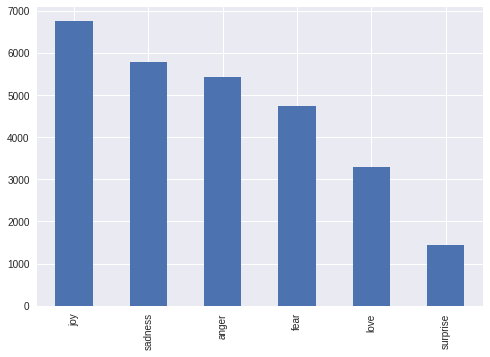

In [58]:
#douplicate the  imbalanced labels to balance data

df2 = df[df.Sentiment.isin(['fear','anger','love','surprise'])]
df = pd.concat([df,df2])
df['Sentiment'].value_counts().plot(kind = 'bar')

In [59]:
# Prepare Victorizer 
from sklearn.feature_extraction.text import CountVectorizer
from nltk.tokenize import RegexpTokenizer

token = RegexpTokenizer(r'[a-zA-Z0-9]+')
cv = CountVectorizer(stop_words='english', ngram_range=(1,1), tokenizer = token.tokenize)

# fit Victorizer 
X = cv.fit_transform(df['Input'])


In [60]:
#split data set 
from sklearn.model_selection import train_test_split

y = df['Sentiment']

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.15, random_state=20)

In [61]:
#intial and fit the ML model
from sklearn.ensemble import RandomForestClassifier
model_emotions = RandomForestClassifier()
model_emotions.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [62]:
# Test Model and print Accuracy 
from sklearn import metrics
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix,classification_report

predicted = model_emotions.predict(X_test)
acc_score = metrics.accuracy_score(predicted,y_test)
prec_score = precision_score(y_test,predicted, average='macro')
recall = recall_score(y_test, predicted,average='macro')
f1 = f1_score(y_test,predicted,average='macro')
matrix = confusion_matrix(y_test,predicted)


print(str('Accuracy: '+'{:04.2f}'.format(acc_score*100))+'%')
print(str('Precision: '+'{:04.2f}'.format(prec_score*100))+'%')
print(str('Recall: '+'{:04.2f}'.format(recall*100))+'%')
print('F1 Score: ',f1)
print(matrix)


Accuracy: 93.42%
Precision: 92.64%
Recall: 94.27%
F1 Score:  0.9331605638424328
[[774   2   0   2   0   0]
 [ 13 704   0   2   2   5]
 [ 12  11 911  52  34   9]
 [  2   0  11 449   0   0]
 [ 38  25  21  14 811   5]
 [  0  11   0   0   0 197]]


In [63]:
# manual check on Model 

In [64]:
text  = ['this makes me happy' , ' this is a  let down ', ' I am sad ', ' I am pissed off' , 'I liked him alot', ' it disgust me']
result =model_emotions.predict(cv.transform(text))

results = pd.DataFrame(text,result)
results

,0
joy,this makes me happy
anger,this is a let down
sadness,I am sad
anger,I am pissed off
love,I liked him alot
anger,it disgust me


In [65]:
# Save the model using pickle 
import pickle
filename = 'emotions_detector.sav'
pickle.dump(model_emotions, open(filename, 'wb'))
pickle.dump(cv, open("vectorizer.pickle", "wb"))
#test Loading the model 
loaded_model = pickle.load(open(filename, 'rb'))
pickle.load(open("vectorizer.pickle", 'rb'))

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
                lowercase=True, max_df=1.0, max_features=None, min_df=1,
                ngram_range=(1, 1), preprocessor=None, stop_words='english',
                strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=<bound method RegexpTokenizer.tokenize of RegexpTokenizer(pattern='[a-zA-Z0-9]+', gaps=False, discard_empty=True, flags=<RegexFlag.UNICODE|DOTALL|MULTILINE: 56>)>,
                vocabulary=None)

# Importing needed libraries 


In [66]:
from flair.models import TextClassifier
from flair.data import Sentence
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use("seaborn")
import math
import plotly.express as px
import pandas as pd
import plotly.graph_objects as go
import warnings
warnings.filterwarnings('ignore')
import spacy
nlp_md = spacy.load('en_core_web_md')
import plotly.express as px
import pickle

# Defining Functions 

In [73]:

# load book , clean data and split into sentences 
def Load_book(path):
  book = open(path, 'r').read()
  book = book.replace("_",' ')
  book = book.replace("\n",'')
  sentences  = book.split('.')

  return sentences 

# run sentiment analysis on each sentence in the book and save them into df_setiment 
def Analyzse_sentiment(sentences):
  tagger = TextClassifier.load('sentiment')
  df_sentiment = pd.DataFrame((np.zeros((4,int(len(sentences))))))
  for i, sentence in enumerate(sentences):
    warnings.filterwarnings('ignore')
    sentence = Sentence(sentence)
    tagger.predict(sentence)
    df_sentiment[i].update(sentence.labels)


  for i , sentence in enumerate(df_sentiment.iloc[0,:]):
      try:
        df_sentiment.iloc[1,i] = sentence.value
        if sentence.value == 'NEGATIVE':
          df_sentiment.iloc[2,i] = sentence.score * (-1)
        else:
          df_sentiment.iloc[2,i] = sentence.score
      except:
        pass

  return df_sentiment


# calcualte Major and Minor sentiment and vizualize it in a dashabord style

def Display_sentiment(df_sentiment  , booktitle = ' book title'):

  l = df_sentiment.iloc[2,:]
  l = pd.DataFrame(l) 
  l['Major'] = l.iloc[:,0].rolling(40).mean()
  l['Minor'] = l.iloc[:,0].rolling(10).mean()

  fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(30, 15))
  axes[0].set_title('Sentimental Tendency' , fontsize = 30 )
  axes[0].plot(l['Major'])
  axes[0].set_xlabel('Sentences' , fontsize=20)
  axes[0].set_ylabel('Sentiment', fontsize=20)
  axes[0].legend(['Major Sentiment(rolling average for 30 sentences)'], fontsize=20)
  axes[0].fill_between(l.index, l['Major'] ,0 , where=l['Major'] >= 0, facecolor='lightgreen',  interpolate=True)
  axes[0].fill_between(l.index, l['Major'] ,0 , where=l['Major'] <= 0, facecolor='lightcoral',  interpolate=True)
  axes[0].set_facecolor('white')
  axes[1].plot(l['Minor'])
  axes[1].set_xlabel('Sentences' , fontsize=15)
  axes[1].set_ylabel('Sentiment' , fontsize=15)
  axes[1].fill_between(l.index, l['Minor'] ,0 , where=l['Minor'] >= 0, facecolor='lightgreen',  interpolate=True)
  axes[1].fill_between(l.index, l['Minor'] ,0 , where=l['Minor'] <= 0, facecolor='lightcoral',  interpolate=True)
  axes[1].set_facecolor('white')
  axes[1].legend(['Minor Sentiment(rolling average for 5 sentences)'] , fontsize=20)
# run emotions dedection on each sentence 
def Analyzse_Emotions(sentences):
  token = RegexpTokenizer(r'[a-zA-Z0-9]+')
  cv = pickle.load(open("vectorizer.pickle", 'rb'))
  df_emotions = pd.DataFrame((np.zeros((1,int(len(sentences))))))
  filename = 'emotions_detector.sav'
  model = pickle.load(open(filename, 'rb'))
  for i , sentence in enumerate( sentences):
    try:
        result = model.predict(cv.transform([sentence]))
        df_emotions[i].update(result)
    except:
      pass
  return df_emotions


# perform calculations on df_emotions and display results 
def Display_emotions(df_emotions , booktitle = 'Book Title'):
  
  l = df_emotions.T.value_counts().index
  l = l.tolist()
  v = df_emotions.T.value_counts()
  v = v.tolist()
  fig = go.Figure(data=go.Scatterpolar(r=v,theta=l,fill='toself'))
  fig.update_layout(polar=dict(radialaxis=dict(visible=False),),showlegend=False ,   title={
        'text': ' Composition of Emotion ',
        'xanchor': 'center',
        'yanchor': 'top'})
  fig.show()


  df_emotions1 = df_emotions.T
  df_emotions1['Sentences(100)'] =  ((df_emotions1.index/100).astype(int))*100
  df_emotions1['1'] = df_emotions1.index
  data = df_emotions1.groupby(by=['Sentences(100)',0]).count()
  data = pd.DataFrame(data)
  data.reset_index(inplace=True)  
  data.columns = ['Sentences','Emotion','Count']
  fig = px.line(data,
                 x=	'Sentences' ,  y='Count', color='Emotion',
                 title="Emotional Journey")

  fig.show()


# The Below Function retrive a Data Frame containing all the Entities detected and entity label ( index is sentence in text)
def Analyze_entities(sentences):
  df_ent = pd.DataFrame((np.zeros((100,int(len(sentences))))))
  df_ents = pd.DataFrame((np.zeros((3,int(len(sentences))))))
  l = []
  for i , sentence in enumerate(sentences):
    doc = nlp_md(sentence)
    df_ent[i].update(doc.ents)
  for  j , raw in df_ent.iteritems():
    for i , item in enumerate(raw):
      item2 = item
      if str(item2) != '0.0':
        l = [j , item.text , item.label_]
        df_ents[j].update(l)
  df_ents = df_ents.T
  df_ents = df_ents[df_ents[1] != 0]
  df_ents.columns = ['index','entity','label']
  df_ents = df_ents[df_ents.label.isin([ 'PERSON' ,'NORP','GPE', 'LOC','EVENT', 'LAW'])]
  return df_ents
  
#the Below Function draw a Sunburt chart displaying entities mentioned alog with their types 
def Display_entities(df_ents):
  df_ents = df_ents.groupby(by=['label','entity']).count().sort_values(by='index', ascending=False).head(20)
  df_ents = df_ents.reset_index(level=['label', 'entity'])
  df = px.data.tips()
  fig = px.sunburst(df_ents, path=['label', 'entity'], values='index' , title="Mentions of Entities (locations, nationalities, events, and characters)")
  fig.show()

def Analyze_Book(path,booktitle="Book Title"):
  warnings.filterwarnings('ignore')
  sentences = Load_book(path)
  df_sent = Analyzse_sentiment(sentences)
  df_emo = Analyzse_Emotions(sentences)
  df_ent = Analyze_entities(sentences)
  Display_sentiment(df_sent)
  Display_entities(df_ent)
  Display_emotions(df_emo)


2020-12-14 21:43:05,179 loading file /root/.flair/models/sentiment-en-mix-distillbert_3.1.pt
2020-12-14 21:44:25,100 Warning: An empty Sentence was created! Are there empty strings in your dataset?
2020-12-14 21:44:25,103 Warning: An empty Sentence was created! Are there empty strings in your dataset?
2020-12-14 21:44:27,618 Warning: An empty Sentence was created! Are there empty strings in your dataset?
2020-12-14 21:44:27,621 Warning: An empty Sentence was created! Are there empty strings in your dataset?
2020-12-14 21:44:27,972 Warning: An empty Sentence was created! Are there empty strings in your dataset?
2020-12-14 21:44:27,975 Warning: An empty Sentence was created! Are there empty strings in your dataset?
2020-12-14 21:44:28,242 Warning: An empty Sentence was created! Are there empty strings in your dataset?
2020-12-14 21:44:28,244 Warning: An empty Sentence was created! Are there empty strings in your dataset?
2020-12-14 21:44:28,247 Warning: An empty Sentence was created! Are

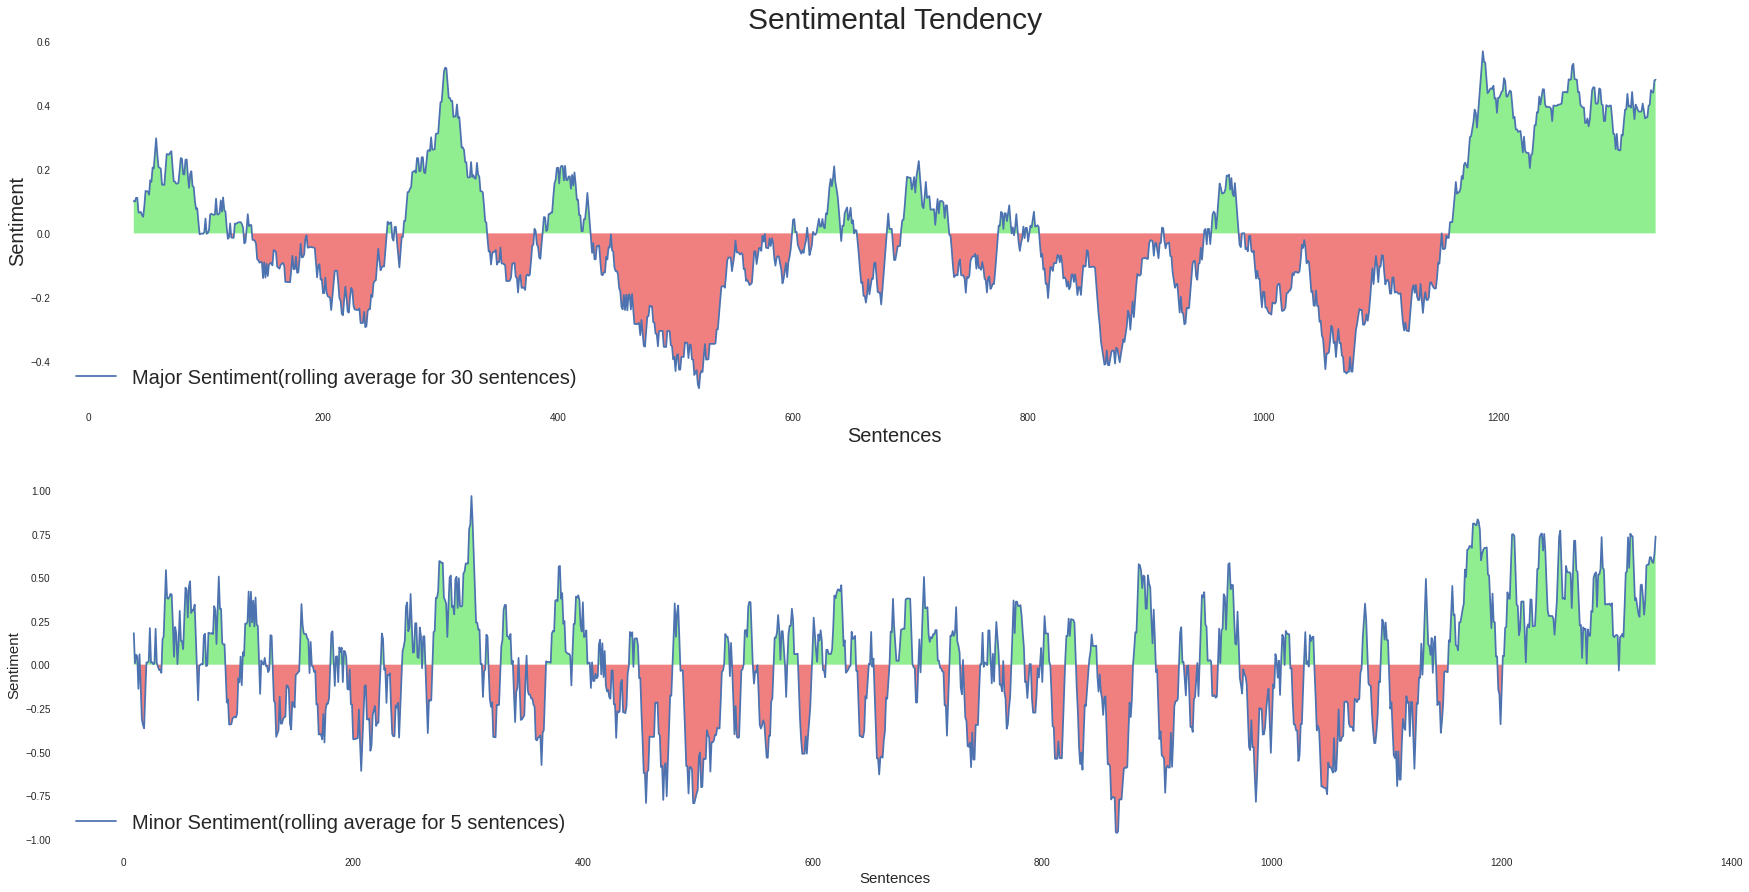

In [74]:
Analyze_Book('/content/On the Genealogy of Morality.txt')

In [ ]:
Analyze_Book('/content/The Birth of Tragedy.txt')

In [ ]:
Analyze_Book('/content/Beyond good and Evil.txt)

In [ ]:
sentences

In [81]:
filtered_list = [i for indx,i in enumerate(sentences) if i == ' ']

0